# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

df = pd.read_csv('datasets/antropometria-dataset.csv')
df.head(5)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


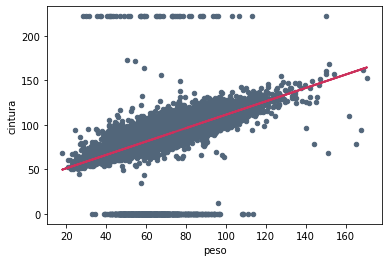

In [3]:
lm = linear_model.LinearRegression()
X= pd.DataFrame(df['peso'])
Y= pd.DataFrame(df['cintura'])
df.plot(kind='scatter', x='peso', 
        y='cintura', color ='#52667a')

df.fillna(0, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

model_lm = lm.fit(X,Y)

plt.plot(X,model_lm.predict(X),
        linewidth=2, color='#cc315c')

In [4]:
model_lm.intercept_

array([36.28671834])

In [5]:
model_lm.coef_

array([[0.75231468]])

In [6]:
df2=df[['peso','cintura']]
df2['reg'] = model_lm.predict(X)
df2

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,peso,cintura,reg
0,73.70,98.70,91.732310
1,35.65,64.00,63.106737
2,54.80,67.60,77.513563
3,33.40,60.60,61.414029
4,97.95,113.00,109.975942
...,...,...,...
18635,75.80,93.00,93.312171
18636,69.40,103.05,88.497357
18637,46.75,71.35,71.457430
18638,59.05,99.95,80.710900


In [7]:
df2['res'] = model_lm.predict(X) - df[['cintura']]
df2

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,peso,cintura,reg,res
0,73.70,98.70,91.732310,-6.967690
1,35.65,64.00,63.106737,-0.893263
2,54.80,67.60,77.513563,9.913563
3,33.40,60.60,61.414029,0.814029
4,97.95,113.00,109.975942,-3.024058
...,...,...,...,...
18635,75.80,93.00,93.312171,0.312171
18636,69.40,103.05,88.497357,-14.552643
18637,46.75,71.35,71.457430,0.107430
18638,59.05,99.95,80.710900,-19.239100


In [9]:
df2['res'].median()

-1.5898501315467044

In [10]:
df3=df[['peso','cintura','sexo']]
df3m = df3[df3['sexo'] ==1]
df3f = df3[df3['sexo'] ==2]
df3m['res'] = model_lm.predict(X) - df[['cintura']]
df3m

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,peso,cintura,sexo,res
3,33.400,60.60,1,0.814029
5,31.900,59.50,1,0.785557
9,48.025,79.65,1,-7.233369
17,31.500,60.70,1,-0.715369
21,59.850,96.20,1,-14.887248
...,...,...,...,...
18626,77.350,104.25,1,-9.771741
18627,68.600,100.75,1,-12.854494
18630,57.050,83.60,1,-4.393729
18634,118.850,132.00,1,-6.300682


In [12]:
df3f['res'] = model_lm.predict(X) - df[['cintura']]
df3f

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,peso,cintura,sexo,res
0,73.70,98.70,2,-6.967690
1,35.65,64.00,2,-0.893263
2,54.80,67.60,2,9.913563
4,97.95,113.00,2,-3.024058
6,31.95,57.30,2,3.023172
...,...,...,...,...
18633,75.40,94.10,2,-1.088755
18635,75.80,93.00,2,0.312171
18636,69.40,103.05,2,-14.552643
18638,59.05,99.95,2,-19.239100


In [14]:
df3m['peso'].mean()

67.13122761834683

In [15]:
df3f['peso'].mean()

62.70050305168796

In [16]:
df3m['res'].mean()

-0.7120746296508282

In [17]:
df3f['res'].mean()

0.5537150991963646